# Step 1: select blood type, field strength and refocusing interval:
### To get started, "execute" the following cell by clicking on it and pressing Ctrl+Enter.  Then choose appropriate parameters.

In [1]:
%matplotlib inline
import some_funcs as sf
field_strength, blood_type, tau_180 = sf.display_widgets()

# Step 2: load appropriate parameters:
### Execute the following cell (click and press Ctrl+Enter) and confirm that parameters listed below are consistent with your choices.

In [5]:
model_pars = sf.fetch_model_pars(sf.par_dict, blood_type=blood_type.value, field_strength=field_strength.value)  
coeff_list = sf.calc_coeffs(model_pars, tau_180=0.001*tau_180.value) 

Blood type = Fetal
Field strength = 3T
Refocusing interval = 16 ms


# Step 3: Choose from options 1-3 below.  To make your choice, execute the cell immediately below your chosen option.  Then enter the appropriate information in the fields provided.  To obtain the solution, execute the cell below the text which reads 'Calculate!'.

# Option 1: calculate hematocrit (Hct) from oxygen-saturation (sO<sub>2</sub>) and T<sub>1</sub>:
## 1) Enter sO<sub>2</sub> and T<sub>1</sub>

In [ ]:
sO2, T1 = sf.display_sO2_T1_boxes()

## 2) Calculate!

In [ ]:
Hct_sol = sf.Hct_from_sO2_T1(coeff_list, sO2=sO2.value, T1=0.001*T1.value)
sf.plot_T1_Hct(model_pars, Hct_sol, sO2=sO2.value, T1=0.001*T1.value)

# Option 2: calculate oxygen-saturation (sO<sub>2</sub>) from hematocrit (Hct) and T<sub>2</sub>: 
## 1) Enter Hct and T<sub>2</sub>:

In [ ]:
Hct, T2 = sf.display_Hct_T2_boxes()

## 2) Calculate!
### NOTE: We are solving a quadratic, so there will be TWO solutions for sO<sub>2</sub>. Typically only one of these will be physical (i.e. 0&lt;sO<sub>2</sub>&lt;1).  Physical solutions are plotted below.

In [ ]:
sO2_sol = sf.sO2_from_Hct_T2(coeff_list, Hct=Hct.value, T2=0.001*T2.value)
sf.plot_T2_sO2(model_pars, sO2_sol, tau_180=0.001*tau_180.value, Hct=Hct.value, T2=0.001*T2.value)

# Option 3: calculate oxygen-saturation (sO<sub>2</sub>) and hematocrit (Hct) from T<sub>1</sub> and T<sub>2</sub>: 
## 1) Enter T<sub>1</sub> and T<sub>2</sub>:

In [3]:
T1, T2 = sf.display_T1_T2_boxes()

## 2) Calculate!
### NOTE: We are solving a cubic, so there will be THREE solutions for (sO<sub>2</sub>, Hct).  In most cases, only one solution will be physical (i.e. 0&lt;sO<sub>2</sub>&lt;1 AND 0&lt;Hct&lt;1).  Physical solutions are plotted below. 

solution 1: sO2 = 2.06, Hct = 1.04
solution 2: sO2 = 1.08, Hct = 0.50
solution 3: sO2 = 0.91, Hct = 0.46


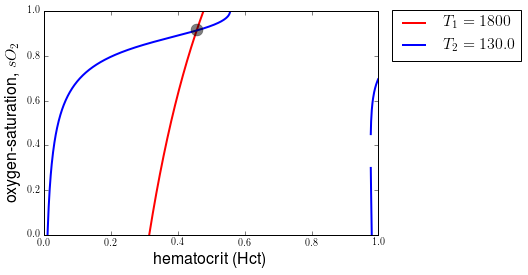

In [8]:
Hct_sol, sO2_sol = sf.Hct_sO2_from_T1_T2(coeff_list, T1=0.001*T1.value, T2=0.001*T2.value)
sf.plot_T1_T2_Hct_sO2(coeff_list, Hct_sol, sO2_sol, T1=0.001*T1.value, T2=0.001*T2.value)

## For interpretation of cases where there is no physical solution or more than one physical solution, please refer to: Portnoy et al, <i>Magn Reson Med</i>, 2017, doi: 10.1002/mrm.26599.